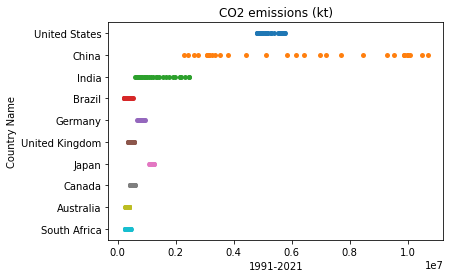

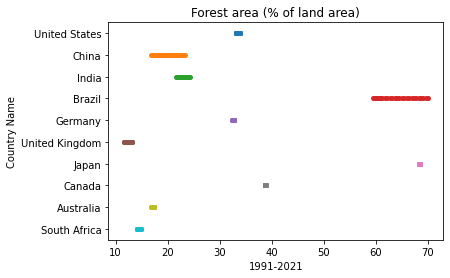

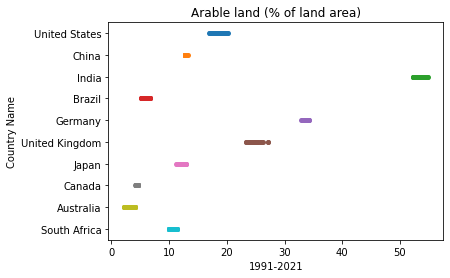

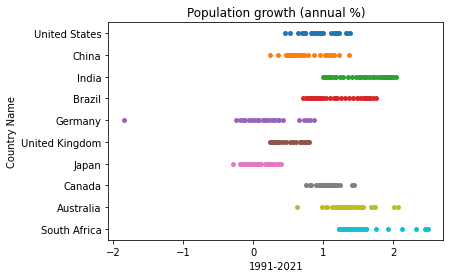

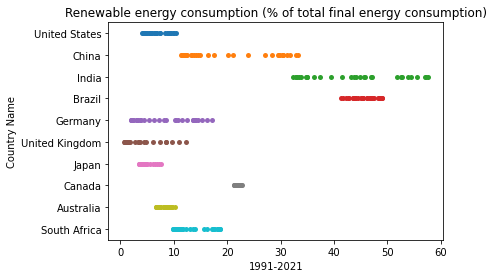

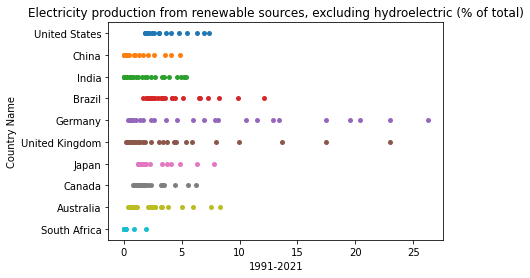

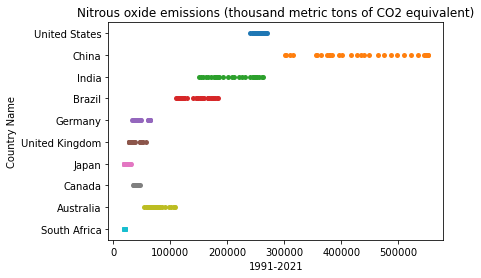

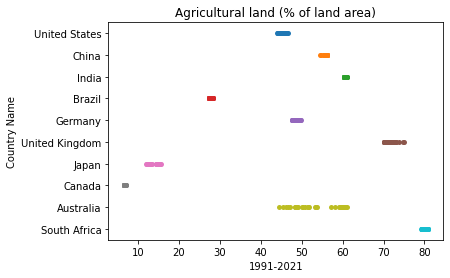

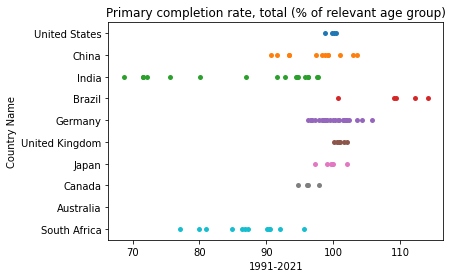

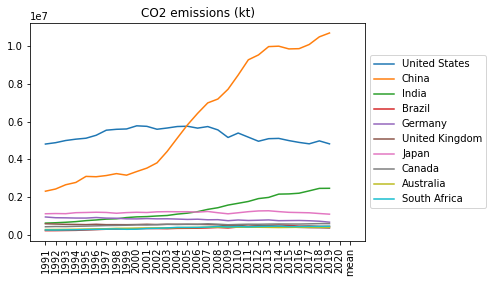

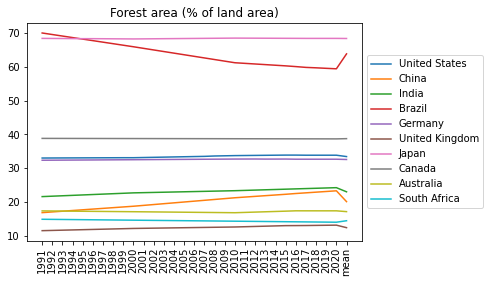

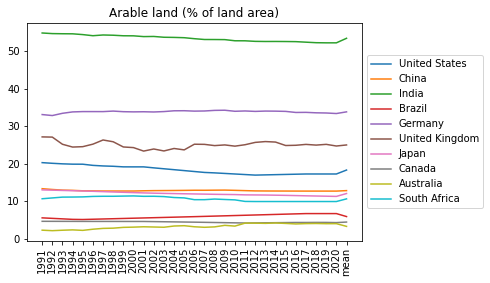

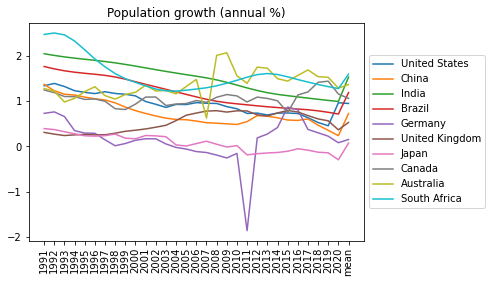

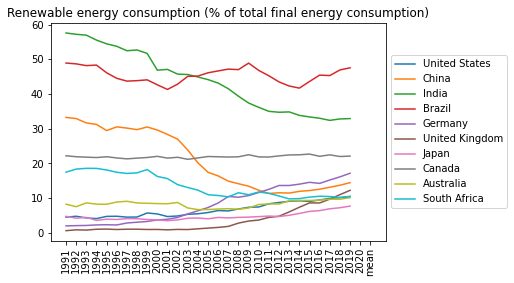

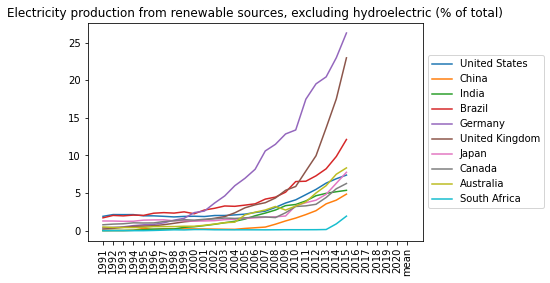

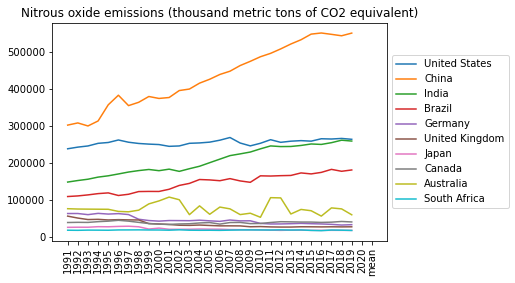

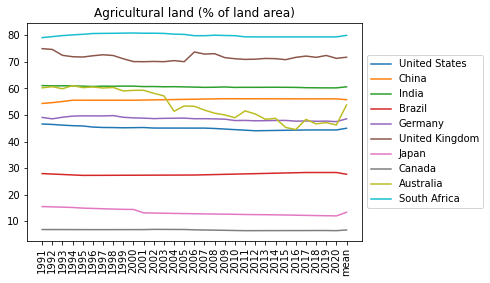

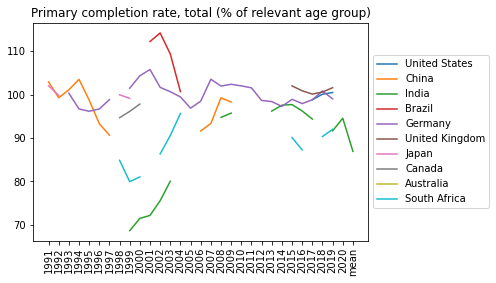

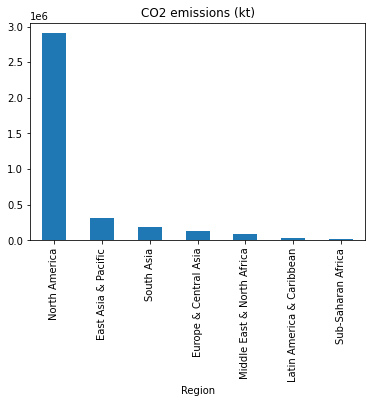

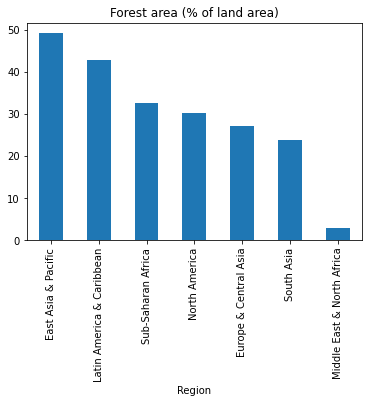

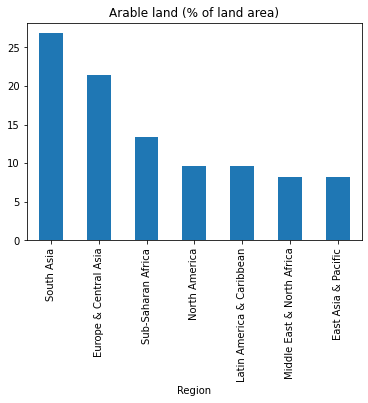

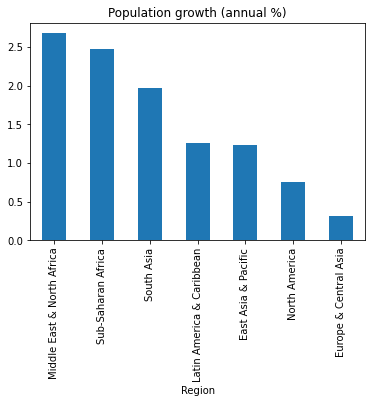

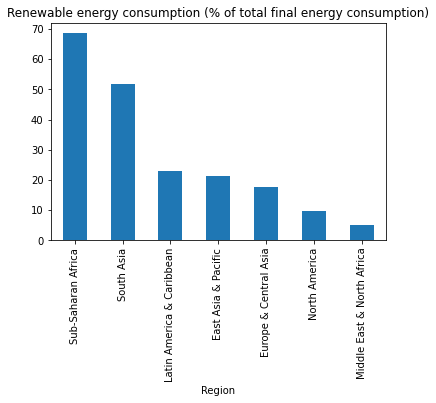

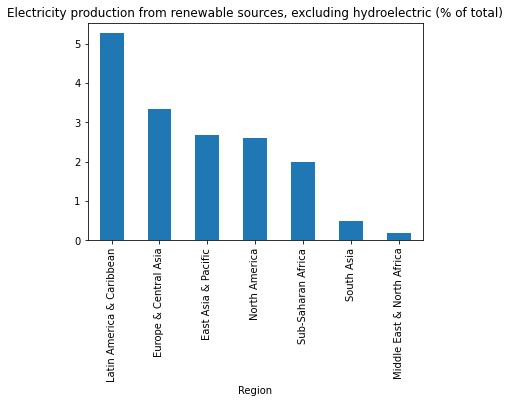

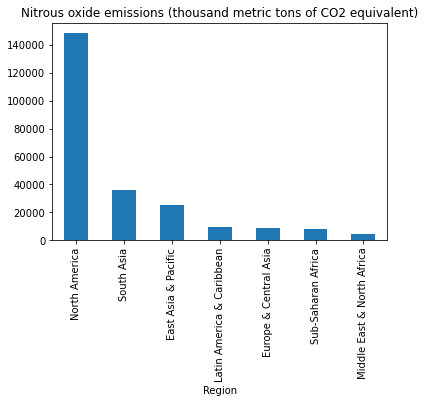

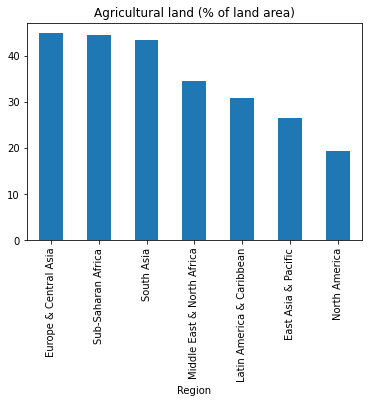

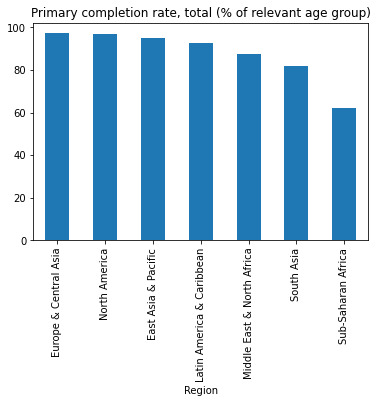

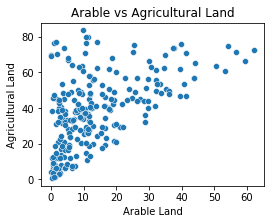

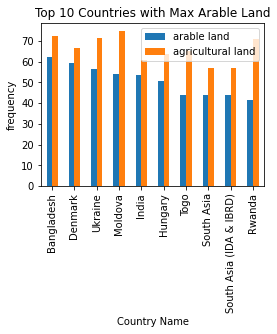

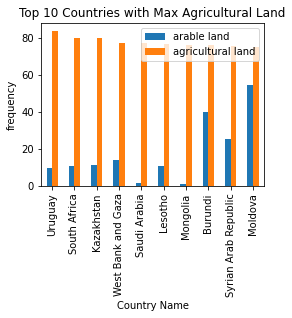

N_DF
                    Country Name  Renewable Energy Consumption  \
0                          Aruba                      2.460754   
1    Africa Eastern and Southern                     63.244739   
2                    Afghanistan                     28.664969   
3     Africa Western and Central                     82.132314   
4                         Angola                     62.520680   
..                           ...                           ...   
261                       Kosovo                     23.041000   
262                  Yemen, Rep.                      1.377144   
263                 South Africa                     13.521380   
264                       Zambia                     86.765933   
265                     Zimbabwe                     74.991096   

     Electricity Production from Renewable Sources  
0                                              NaN  
1                                         0.657139  
2                                          

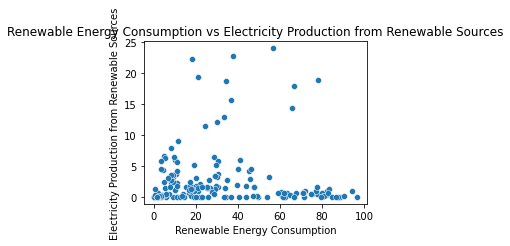

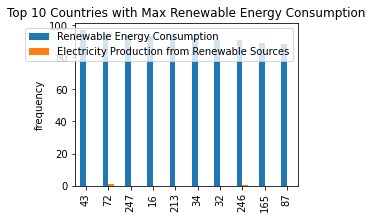

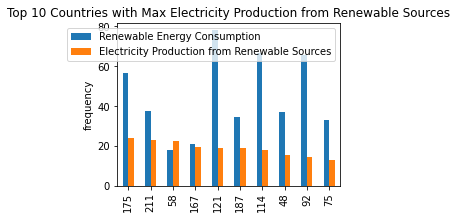

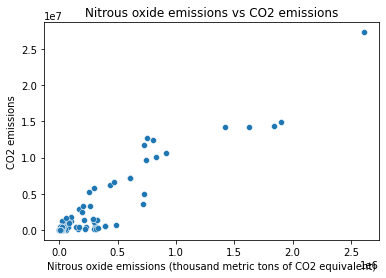

Indicator Name  CO2 emissions (kt)  Forest area (% of land area)  \
count                 2.390000e+02                    261.000000   
mean                  1.022671e+06                     32.355054   
std                   3.199715e+06                     23.226022   
min                   1.000000e+01                      0.000000   
25%                   2.648448e+03                     12.430556   
50%                   2.323069e+04                     30.768669   
75%                   2.663552e+05                     46.820719   
max                   2.731978e+07                     98.121995   

Indicator Name  Arable land (% of land area)  Population growth (annual %)  \
count                             254.000000                    265.000000   
mean                               13.389299                      1.443849   
std                                12.620563                      1.142133   
min                                 0.046216                     -1.124733 

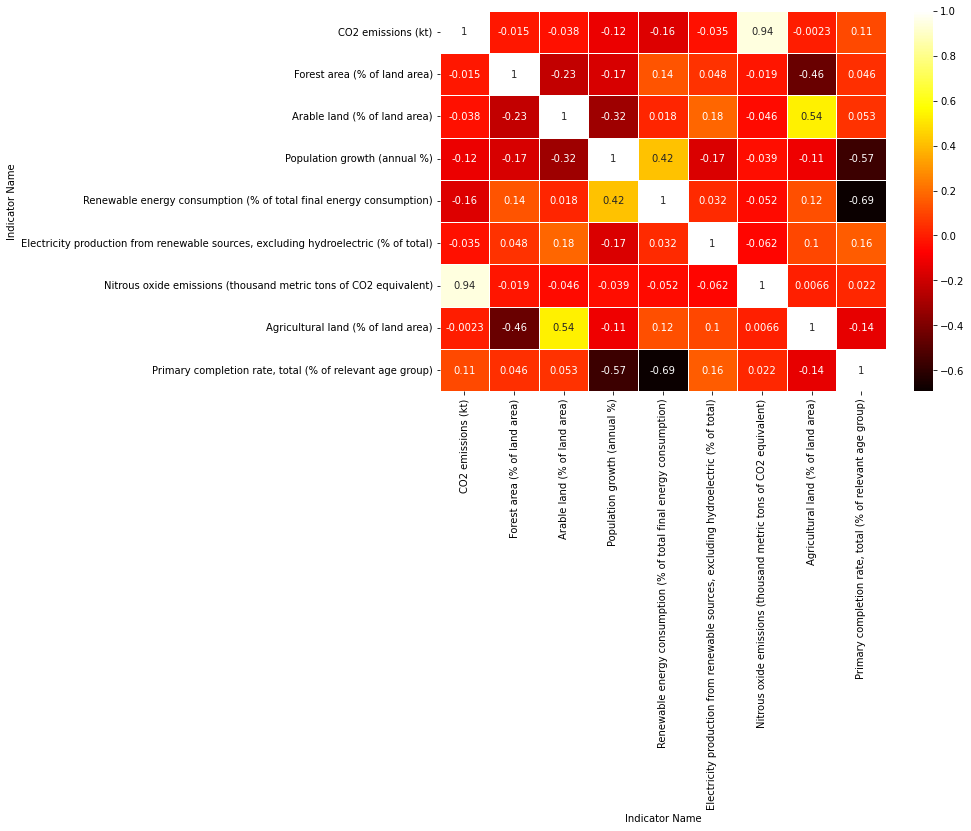

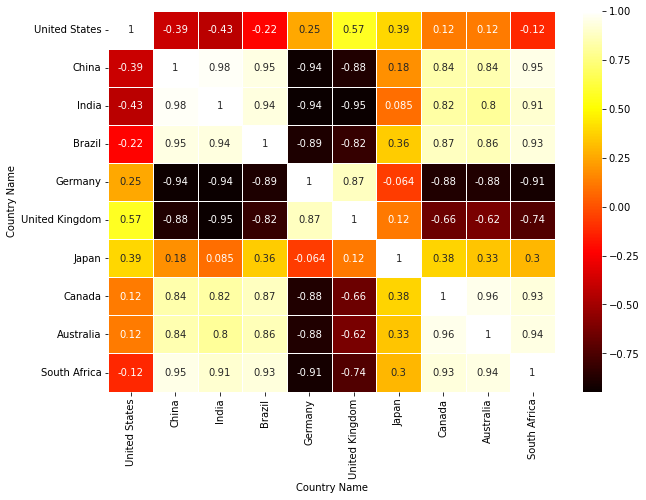

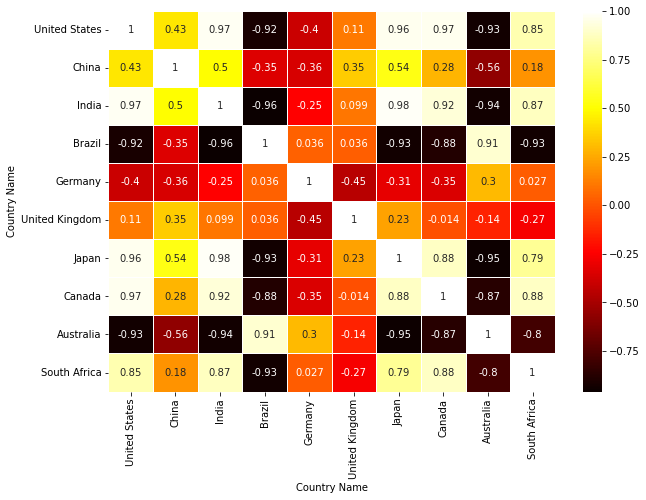

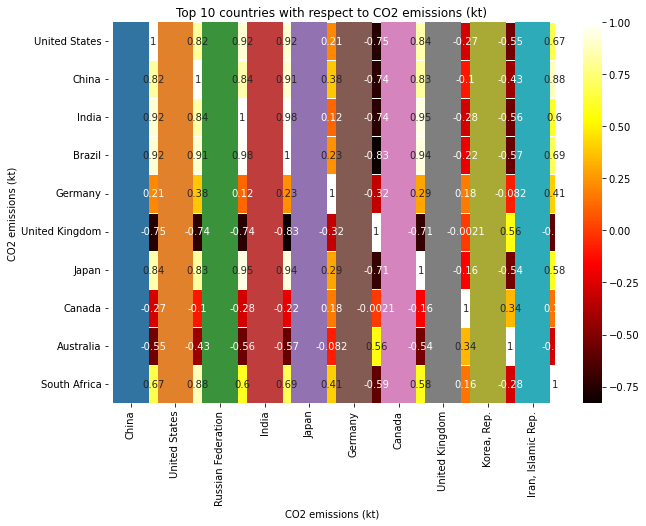

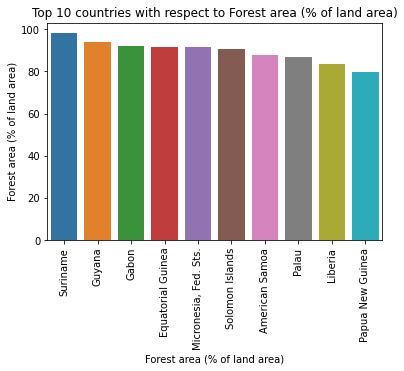

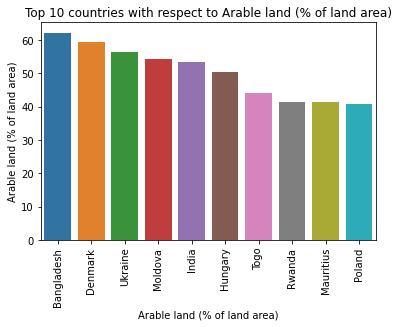

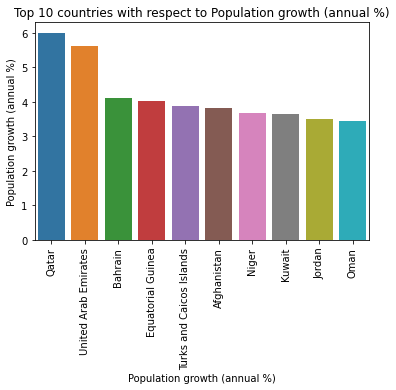

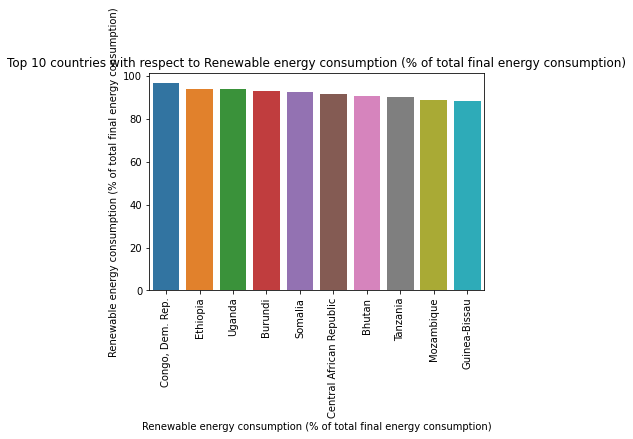

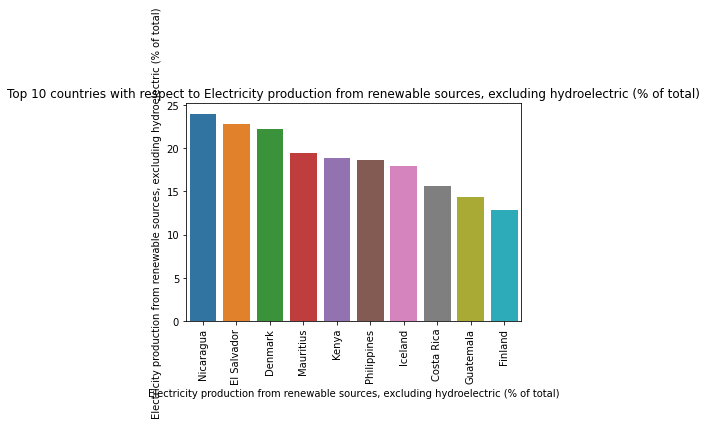

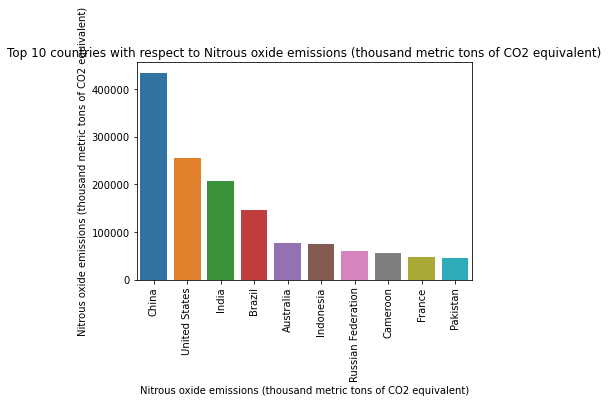

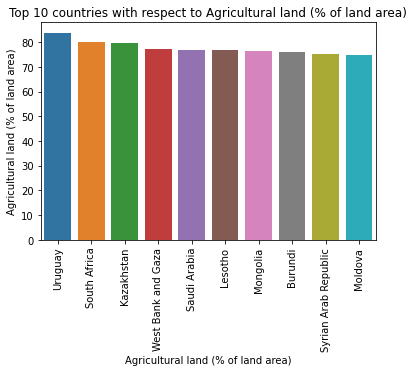

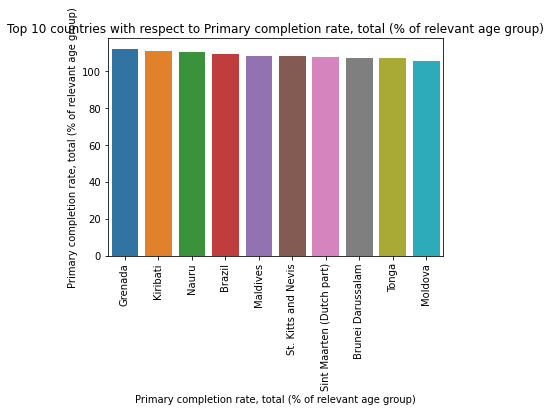

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set option to display all columns
pd.set_option('display.max_columns', None)

# Read data from CSV files
df = pd.read_csv('data.csv')
dfc = pd.read_csv('metadata.csv')

# Filter out rows where 'IncomeGroup' column is null
dfc1 = dfc[~pd.isna(dfc['IncomeGroup'])]

# Reorder columns in 'df'
df = df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
         '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
         '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
         '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
         '2015', '2016', '2017', '2018', '2019', '2020']]

# Compute mean for each row and add as new column 'mean'
df['mean'] = df[[
        '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
        '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
        '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015', '2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# Define selected indicators and countries
selected_indicators = [
    'CO2 emissions (kt)', 
    'Forest area (% of land area)',
    'Arable land (% of land area)', 
    'Population growth (annual %)',
    'Renewable energy consumption (% of total final energy consumption)',
    'Electricity production from renewable sources, excluding hydroelectric (% of total)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Agricultural land (% of land area)',
    'Primary completion rate, total (% of relevant age group)'
]

countries = [
    'United States', 'China', 'India', 'Brazil', 'Germany', 
    'United Kingdom', 'Japan', 'Canada', 'Australia', 'South Africa'
]

# Drop unnecessary columns from 'df'
df = df.drop(['Country Code', 'Indicator Code'], axis=1)

# Define a function for data ingestion
def data_ingestion(df, indicator):
    """
    This function ingests data and returns two dataframes. The first dataframe contains data for a specific indicator,
    and the second dataframe contains the transposed data for the same indicator.
    
    Parameters:
    df (dataframe): The input dataframe containing all the data
    indicator (str): The indicator name for which the data is needed

    Returns:
    df1 (dataframe): The dataframe containing data for the specific indicator
    df2 (dataframe): The transposed dataframe for the specific indicator
    """
    df1 = df[df['Indicator Name'] == indicator]
    df1 = df1.drop(['Indicator Name'], axis=1)
    df1.index = df1.loc[:, 'Country Name']
    df1 = df1.drop(['Country Name'], axis=1)
    df2 = df1.transpose()
    return df1, df2

df_year, df_country = data_ingestion(df, 'Population, total')


# loop through selected indicators
for ind in selected_indicators:
    # get data for selected indicator
    df_year, df_country = data_ingestion(df, ind)
    
    # plot swarmplot for each year
    for i in df_year.columns:
        sns.swarmplot(y='Country Name',x=i, data=df_year.loc[countries, :].reset_index())
    
    # add title and x-label to plot
    plt.title(ind)
    plt.xlabel('1991-2021')
    plt.show()
    
# loop through selected indicators
for ind in selected_indicators:
    # get data for selected indicator
    df_year, df_country = data_ingestion(df, ind)
    
    # plot line graph for each selected country
    for i in countries:
        plt.plot(df_country[i], label=i)

    # add title, legend, and x-label to plot
    plt.title(ind)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.show()

# loop through selected indicators
for i in selected_indicators:
    # filter dataframe to selected indicator and merge with country data
    temp_df = df[df['Indicator Name'] == i]
    temp_df = temp_df.merge(dfc1,left_on='Country Name', right_on='TableName')
    
    # groupby region and plot mean
    temp_df.groupby(['Region'])['mean'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i)
    plt.show()

# Call data_ingestion function to retrieve data for 'Arable land (% of land area)' and 'Agricultural land (% of land area)'
df1, df2 = data_ingestion(df, 'Arable land (% of land area)')
df3, df4 = data_ingestion(df, 'Agricultural land (% of land area)')

# Calculate mean of arable land and agricultural land for each country
df1_mean = df1.mean(axis=1).reset_index().rename({0:'arable land'}, axis=1)
df3_mean = df3.mean(axis=1).reset_index().rename({0:'agricultural land'}, axis=1)

# Merge the above dataframes on 'Country Name'
n_df = df1_mean.merge(df3_mean, on='Country Name')

# Plot a scatterplot of arable land vs agricultural land
plt.figure(figsize=(4,3))
sns.scatterplot(x=n_df['arable land'], y=n_df['agricultural land'])
plt.xlabel('Arable Land')
plt.ylabel('Agricultural Land')
plt.title('Arable vs Agricultural Land')
plt.show()

# Set the index of n_df to 'Country Name'
n_df.index = n_df.loc[:, 'Country Name']


# Plot a bar graph of the top 10 countries with the maximum arable land
n_df.sort_values(by='arable land', ascending=False)[:10].plot(kind='bar',figsize=(4,3))
plt.ylabel('frequency')
plt.title('Top 10 Countries with Max Arable Land')
plt.show()

# Plot a bar graph of the top 10 countries with the maximum agricultural land
n_df.sort_values(by='agricultural land', ascending=False)[:10].plot(kind='bar',figsize=(4,3))
plt.ylabel('frequency')
plt.title('Top 10 Countries with Max Agricultural Land')
plt.show()



# Load data for renewable energy consumption and electricity production from renewable sources
df1, df2 = data_ingestion(df, 'Renewable energy consumption (% of total final energy consumption)')
df3, df4 = data_ingestion(df, 'Electricity production from renewable sources, excluding hydroelectric (% of total)')

# Calculate mean values for each country and merge into a single dataframe
df1_mean = df1.mean(axis=1).reset_index().rename({0:'Renewable Energy Consumption'}, axis=1)
df3_mean = df3.mean(axis=1).reset_index().rename({0:'Electricity Production from Renewable Sources'}, axis=1)
n_df = df1_mean.merge(df3_mean, on='Country Name')
print("N_DF")
print(n_df)
n_df1 = df1_mean.merge(df3_mean, on='Country Name')

# Plot scatterplot of renewable energy consumption vs electricity production from renewable sources
plt.figure(figsize=(4,3))
sns.scatterplot(x=n_df['Renewable Energy Consumption'], y=n_df['Electricity Production from Renewable Sources'])
plt.xlabel('Renewable Energy Consumption')
plt.ylabel('Electricity Production from Renewable Sources')
plt.title('Renewable Energy Consumption vs Electricity Production from Renewable Sources')
plt.show()

# Plot bar chart of top 10 countries with highest renewable energy consumption
n_df.sort_values(by='Renewable Energy Consumption', ascending=False)[:10].plot(kind='bar',figsize=(4,3))
plt.ylabel('frequency')
plt.title('Top 10 Countries with Max Renewable Energy Consumption')
plt.show()

# Plot bar chart of top 10 countries with highest electricity production from renewable sources
n_df.sort_values(by='Electricity Production from Renewable Sources', ascending=False)[:10].plot(kind='bar',figsize=(4,3))
plt.ylabel('frequency')
plt.title('Top 10 Countries with Max Electricity Production from Renewable Sources')
plt.show()



# Data ingestion and processing
df1, df2 = data_ingestion(df, 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
df3, df4 = data_ingestion(df, 'CO2 emissions (kt)')

# Plotting the scatter plot
sns.scatterplot(x=df1.mean(axis=1), y=df3.mean(axis=1))
plt.xlabel('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
plt.ylabel('CO2 emissions')
plt.title('Nitrous oxide emissions vs CO2 emissions')
plt.show()


# Grouping and plotting correlation heatmap
df1 = df.groupby(['Country Name','Indicator Name'])['mean'].mean().unstack()
plt.figure(figsize=(10,7))
sns.heatmap(df1[selected_indicators].corr(), cmap='hot', linewidths=.5, annot=True)


# Correlation Graph of some Countries for "CO2 emissions" Indicator
df_year, df_country = data_ingestion(df, 'CO2 emissions (kt)')
plt.figure(figsize=(10,7))
sns.heatmap(df_country[countries].corr(), cmap='hot', linewidths=.5, annot=True)


# Correlation Graph of Countries for "Arable Land" Indicator
df_year, df_country = data_ingestion(df, 'Arable land (% of land area)')
plt.figure(figsize=(10,7))
sns.heatmap(df_country[countries].corr(), cmap='hot', linewidths=.5, annot=True)


# Correlation Graph of Countries for "Population growth (annual %)" Indicator
df_year, df_country = data_ingestion(df, 'Population growth (annual %)')
plt.figure(figsize=(10,7))
sns.heatmap(df_country[countries].corr(), cmap='hot', linewidths=.5, annot=True)

print(df1[selected_indicators].describe())


# Descriptive statistics and plotting top 10 countries for each indicator

df2 = df1.merge(dfc1, left_on=df1.index, right_on='TableName', how='inner')
df2.index = df2['TableName']

for i in df2[selected_indicators]:
    sns.barplot(x='TableName', y=i, data=df2[i].sort_values(ascending=False)[:10].reset_index())
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.title('Top 10 countries with respect to ' + str(i))
    plt.show()

